In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('../data/collisions_routieres.csv')
mapbox_token = "pk.eyJ1IjoidG91amVyMDAiLCJhIjoiY2wwbWt6M3ptMTdhdTNibjU0OGFyMzc3ZiJ9.PYFp4yto8WHEODgZpWbDVQ"

In [3]:
px.set_mapbox_access_token(mapbox_token)

In [4]:
df["DT_ACCDN"] = pd.to_datetime(df["DT_ACCDN"])
df["year"] = df["DT_ACCDN"].dt.year
df["month"] = df["DT_ACCDN"].dt.month
df["day"] = df["DT_ACCDN"].dt.day
df["weekday"] = df["DT_ACCDN"].dt.weekday

In [ ]:
df.head()

NO_SEQ_COLL JR_SEMN_ACCDN   DT_ACCDN  CD_MUNCP  NO_CIVIQ_ACCDN  \
0      SPVM _ 2012 _ 1            ME 2012-02-01   66102.0          3501.0   
1     SPVM _ 2012 _ 10            MA 2012-01-03   66023.0             NaN   
2    SPVM _ 2012 _ 100            VE 2012-02-24   66023.0             NaN   
3   SPVM _ 2012 _ 1000            JE 2012-10-11   66142.0         11800.0   
4  SPVM _ 2012 _ 10000            DI 2012-04-22   66023.0            38.0   

  SFX_NO_CIVIQ_ACCDN  BORNE_KM_ACCDN          RUE_ACCDN  TP_REPRR_ACCDN  \
0                NaN             NaN         ST CHARLES             2.0   
1                NaN             NaN  TERR VILLE DE MTL             NaN   
2                NaN             NaN     JACQUES BIZARD             1.0   
3                NaN             NaN       BD SALABERRY             NaN   
4                NaN             NaN     PL DU COMMERCE             NaN   

  ACCDN_PRES_DE  ...  LOC_COTE_QD  LOC_COTE_PD  LOC_DETACHEE  LOC_IMPRECISION  \
0          STAT  ...            A            3             O                N   
1           NaN  ...            B            4             N                N   
2      CHERRIER  ...            A            1             N                O   
3           NaN  ...            A            1             O                N   
4           NaN  ...            A            1             O                N   

    LOC_LONG    LOC_LAT  year  month  day  weekday  
0 -73.861616  45.455505  2012      2    1        2  
1 -73.878549  45.486871  2012      1    3        1  
2 -73.871542  45.490564  2012      2   24        4  
3 -73.804841  45.484648  2012     10   11        3  
4 -73.543590  45.467136  2012      4   22        6  

[5 rows x 72 columns]

In [6]:
df.columns

Index(['NO_SEQ_COLL', 'JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP',
       'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'RUE_ACCDN',
       'TP_REPRR_ACCDN', 'ACCDN_PRES_DE', 'NB_METRE_DIST_ACCD',
       'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'NO_ROUTE', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS',
       'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE',
       'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'CD_PNT_CDRNL_REPRR',
       'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN',
       'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'MRC',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'NB_DECES_PIETO

## combien de cyclistes ont frappé un pieton (N=4)

In [8]:
pieton_cycliste_cols = ['nb_bicyclette', 'NB_VICTIMES_PIETON']

In [9]:
cond1 = df['nb_bicyclette'] > 0
cond2 = df['NB_VICTIMES_PIETON']>0
df_p_c = df[(df['NB_VICTIMES_PIETON'] > 0) & (df['nb_bicyclette'] > 0)].loc[:, ['nb_bicyclette', 'NB_VICTIMES_PIETON']]

In [10]:
df_p_c.shape

(4, 2)

### Combien d'accident avec un seul acteur

In [21]:
def plot_groupby_date(df, by):
    df1 = df.groupby(by).count()
    fig = px.line(df1.reset_index(), x=by, y="NB_VICTIMES_TOTAL")
    fig.show()

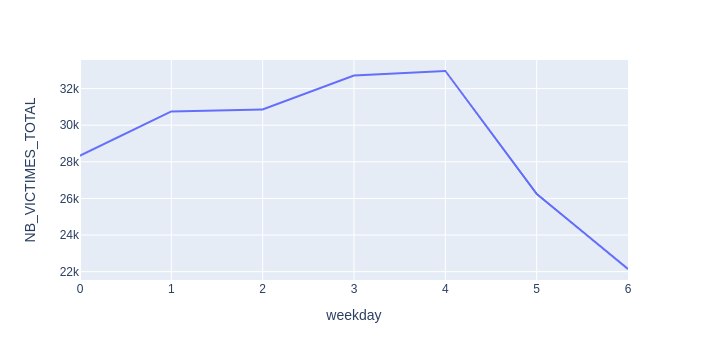

In [22]:
plot_groupby_date(df, "weekday")

# Conséquences Humaines

## Quelles sont les conséquences humaines des accidents piétons/cyclistes impliquant un véhicule lourd ?

Pour répondre à cette question, on va compter le nombre de victime pieton et cycliste impliqué dans un accident avec un véhicule lourd et les autres types de véhicule

In [23]:
def consequenceVehicule(df, vehicule:str, consequences:list):
    dfV = df.loc[:, [vehicule, *consequences]]
    dfV = dfV[dfV[vehicule] > 0]
    sV = dfV.groupby(vehicule).sum().sum()
    sV.name = vehicule
    return sV

def createConsequenceVehiculeTable(df, vehicules:list, consequences:list):
    vehiculeSeries = []
    for vehicule in vehicules:
        vehiculeSeries.append(consequenceVehicule(df, vehicule, consequences))
    return pd.concat(vehiculeSeries, axis=1).transpose()          
                    
    

In [24]:
tableConsequences = createConsequenceVehiculeTable(df,
                   vehicules= ['nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
                               'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
                               'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
                               'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise'],
                   consequences=['NB_VICTIMES_VELO', 'NB_VICTIMES_PIETON', 'NB_MORTS',
                           'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS'])

In [25]:
tableConsequences

NB_VICTIMES_VELO  NB_VICTIMES_PIETON  NB_MORTS  \
nb_automobile_camion_leger               5282                9056       174   
nb_camionLourd_tractRoutier               195                 314        50   
nb_outil_equipement                         9                  70         5   
nb_tous_autobus_minibus                    94                 290        15   
nb_bicyclette                            5975                   7        26   
nb_cyclomoteur                              8                   4         1   
nb_motocyclette                            27                  26        14   
nb_taxi                                   283                 464        10   
nb_urgence                                 38                  50         3   
nb_motoneige                                0                   0         0   
nb_VHR                                      0                   0         0   
nb_autres_types                             5                  13         1   
nb_veh_non_precise                         75                 213         3   

                             NB_BLESSES_GRAVES  NB_BLESSES_LEGERS  
nb_automobile_camion_leger                1555              47962  
nb_camionLourd_tractRoutier                131               2397  
nb_outil_equipement                         14                284  
nb_tous_autobus_minibus                     93               2247  
nb_bicyclette                              259               5813  
nb_cyclomoteur                              30                694  
nb_motocyclette                            123               1569  
nb_taxi                                    100               2668  
nb_urgence                                  20                661  
nb_motoneige                                 0                  2  
nb_VHR                                       2                  2  
nb_autres_types                              4                 61  
nb_veh_non_precise                          28                523

In [26]:
def consequenceVehiculePerYear(df, vehicule:str, consequences:list):
    dfV = df.loc[:, [vehicule, *consequences, 'year']]
    dfV = dfV[dfV[vehicule] > 0]
    dfV = dfV.groupby('year').sum()
    dfV.drop(vehicule, axis=1, inplace = True)
    dfV = dfV.unstack()
    dfV.name = vehicule
    return dfV

def createConsequenceVehiculeTablePerYear(df, vehicules:list, consequences:list):
    vehiculeSeries = []
    for vehicule in vehicules:
        vehiculeSeries.append(consequenceVehiculePerYear(df, vehicule, consequences))
    return pd.concat(vehiculeSeries, axis=1).transpose()          
                    

In [27]:
tableConsequencesPerYear = createConsequenceVehiculeTablePerYear(df,
                   vehicules= ['nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
                               'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
                               'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
                               'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise'],
                   consequences=['NB_VICTIMES_VELO', 'NB_VICTIMES_PIETON', 'NB_MORTS',
                           'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS'])
tableConsequencesPerYear = tableConsequencesPerYear.fillna(0)

In [28]:
tableConsequencesPerYear

NB_VICTIMES_VELO                              \
year                                    2012   2013   2014   2015   2016   
nb_automobile_camion_leger             649.0  666.0  552.0  676.0  663.0   
nb_camionLourd_tractRoutier             28.0   23.0   23.0   26.0   21.0   
nb_outil_equipement                      0.0    0.0    6.0    0.0    1.0   
nb_tous_autobus_minibus                 18.0   14.0   11.0   15.0    4.0   
nb_bicyclette                          765.0  746.0  654.0  765.0  740.0   
nb_cyclomoteur                           1.0    1.0    0.0    2.0    1.0   
nb_motocyclette                          2.0    2.0    1.0    1.0    4.0   
nb_taxi                                 44.0   35.0   51.0   44.0   40.0   
nb_urgence                              11.0    3.0    2.0    3.0    2.0   
nb_motoneige                             0.0    0.0    0.0    0.0    0.0   
nb_VHR                                   0.0    0.0    0.0    0.0    0.0   
nb_autres_types                          1.0    0.0    0.0    0.0    0.0   
nb_veh_non_precise                      17.0   13.0   15.0    4.0    5.0   

                                                        NB_VICTIMES_PIETON  \
year                          2017   2018   2019   2020               2012   
nb_automobile_camion_leger   613.0  559.0  488.0  416.0             1090.0   
nb_camionLourd_tractRoutier   29.0   16.0   11.0   18.0               42.0   
nb_outil_equipement            1.0    0.0    0.0    1.0                6.0   
nb_tous_autobus_minibus        6.0    6.0    9.0   11.0               33.0   
nb_bicyclette                688.0  606.0  544.0  467.0                6.0   
nb_cyclomoteur                 3.0    0.0    0.0    0.0                0.0   
nb_motocyclette                3.0    4.0    6.0    4.0                5.0   
nb_taxi                       27.0   15.0   21.0    6.0               53.0   
nb_urgence                     4.0    6.0    5.0    2.0                6.0   
nb_motoneige                   0.0    0.0    0.0    0.0                0.0   
nb_VHR                         0.0    0.0    0.0    0.0                0.0   
nb_autres_types                2.0    1.0    1.0    0.0                1.0   
nb_veh_non_precise             8.0    0.0    4.0    9.0               27.0   

                             ... NB_BLESSES_GRAVES NB_BLESSES_LEGERS          \
year                         ...              2020              2012    2013   
nb_automobile_camion_leger   ...             125.0            5851.0  5767.0   
nb_camionLourd_tractRoutier  ...              14.0             285.0   292.0   
nb_outil_equipement          ...               1.0              18.0    36.0   
nb_tous_autobus_minibus      ...               6.0             297.0   301.0   
nb_bicyclette                ...              22.0             746.0   706.0   
nb_cyclomoteur               ...               1.0             109.0    83.0   
nb_motocyclette              ...              16.0             171.0   189.0   
nb_taxi                      ...               1.0             374.0   352.0   
nb_urgence                   ...               2.0              86.0    86.0   
nb_motoneige                 ...               0.0               0.0     0.0   
nb_VHR                       ...               0.0               1.0     0.0   
nb_autres_types              ...               1.0               7.0     9.0   
nb_veh_non_precise           ...               0.0              90.0    68.0   

                                                                             \
year                           2014    2015    2016    2017    2018    2019   
nb_automobile_camion_leger   5600.0  5691.0  5700.0  5585.0  5346.0  5056.0   
nb_camionLourd_tractRoutier   266.0   262.0   261.0   264.0   310.0   261.0   
nb_outil_equipement            43.0    23.0    38.0    41.0    30.0    31.0   
nb_tous_autobus_minibus       271.0   252.0   226.0   239.0   261.0   245.0   
nb_bicyclette                 636.0   735

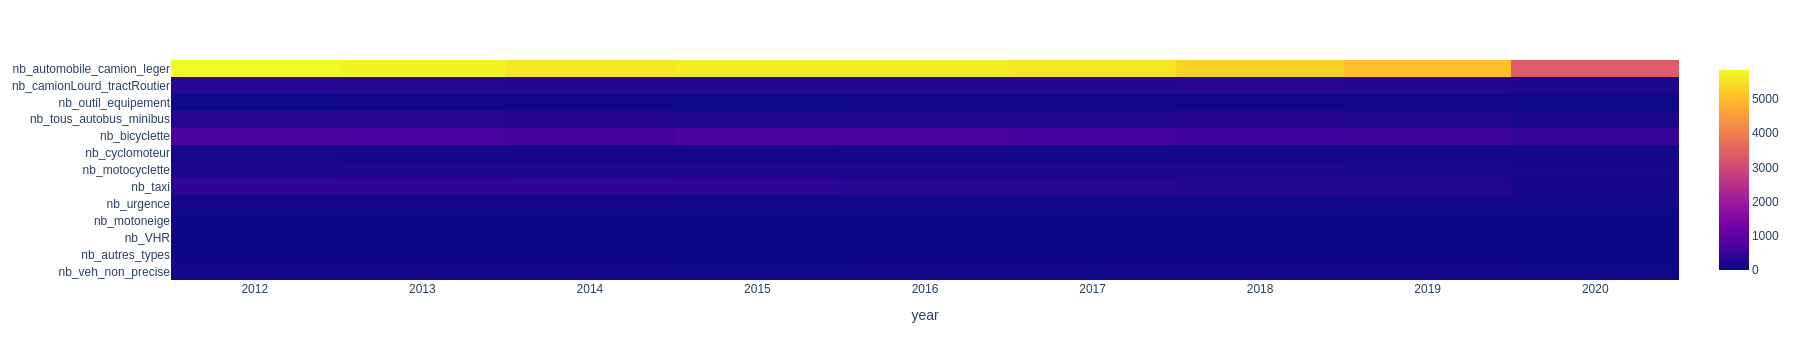

In [29]:
px.imshow(tableConsequencesPerYear['NB_BLESSES_LEGERS'])

# Acteur

Un accident ne se produit pas seul, il y a généralement deux personnes d'impliquées. On s'intéresse maintenant à connaître les couples qui sont le plus souvent impliquer dans un accident

In [30]:
def createCoupleTable(df, lourd, others:list):
    coupleSeries = []
    for other in others:
        otherCond = (df[other] > 0)
        couple = df[lourd & otherCond]
        s = couple.groupby('year').count()['NO_SEQ_COLL']
        s.name = other
        coupleSeries.append(s)
    return pd.concat(coupleSeries, axis=1)
    

In [31]:
lourd = (df['nb_camionLourd_tractRoutier'] > 0)
leger = (df['nb_automobile_camion_leger'] > 0)
cycliste = (df['nb_bicyclette'] > 0)
minibus = (df['nb_tous_autobus_minibus'] > 0)
cyclomoteur = (df['nb_cyclomoteur'] > 0)
moto = (df['nb_motocyclette'] > 0)
urgence = (df['nb_urgence'] > 0)

othersCol = ['nb_automobile_camion_leger', 'nb_bicyclette', 'nb_taxi', 'nb_tous_autobus_minibus', 'nb_cyclomoteur', 'nb_motocyclette', 'nb_urgence'] 

In [32]:
tableCouple = createCoupleTable(df, lourd, othersCol)

### Est-ce que les véhicules lourds génèrent plus d’accidents, que les véhicules légers ?

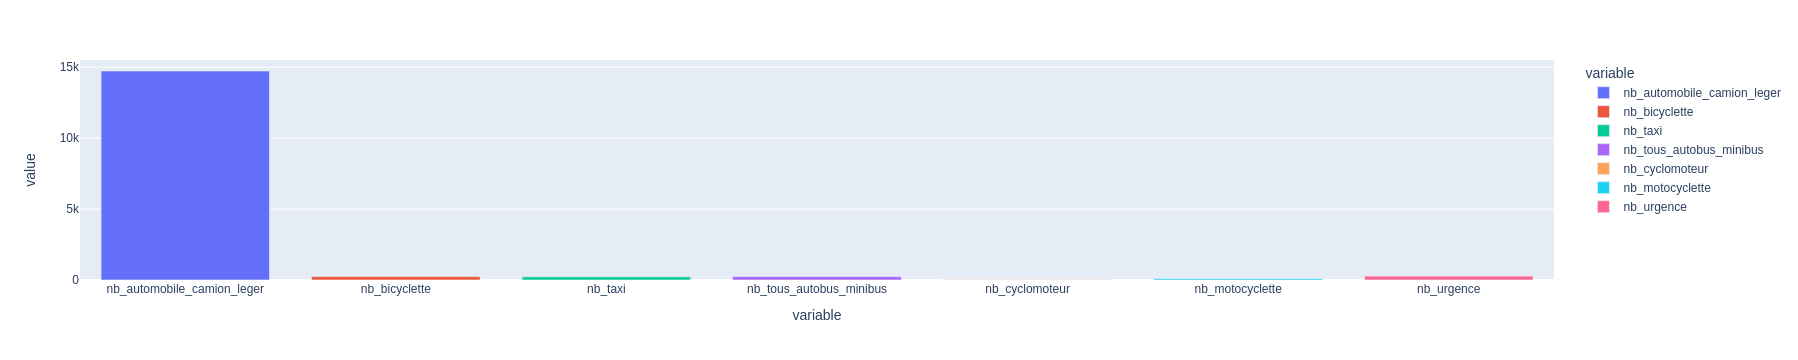

In [50]:
px.bar(tableCouple.sum().reset_index().rename(columns={0:'value', 'index':'variable'}), x='variable', y='value', color='variable')

### Couple par année

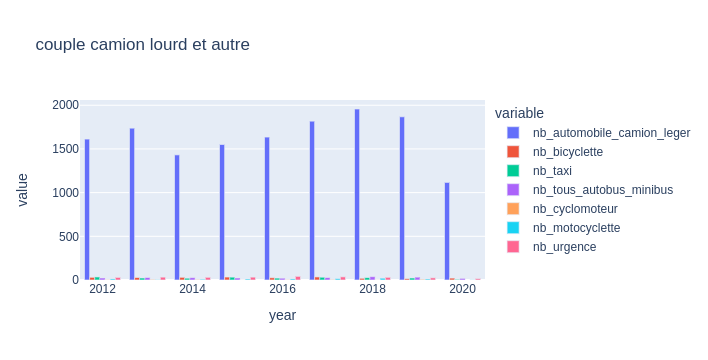

In [33]:
px.bar(tableCouple.reset_index('year').melt(id_vars='year'), 
       x='year',
       y='value',
       color='variable',
       barmode='group',
      title="couple camion lourd et autre")

In [51]:
locDf = df[lourd]

### test mapbox

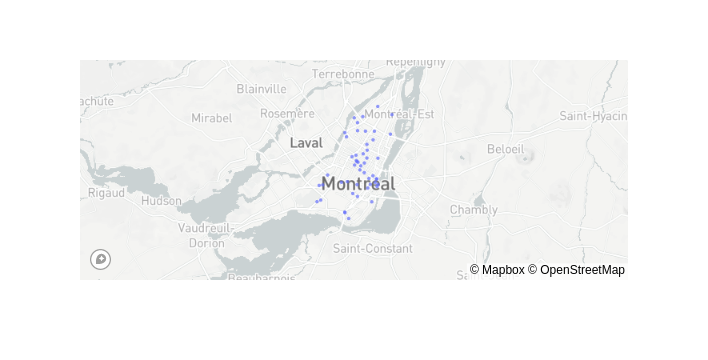

In [213]:
#Code pour mapbox
fig = px.scatter_mapbox(locDf.reset_index(),
                  lat='LOC_LAT',
                  lon='LOC_LONG',
                  size="NB_MORTS",
                  size_max=3,
                  hover_data=["NB_MORTS",
                              "NB_DECES_PIETON",
                              "NB_DECES_VELO",
                             ])
fig.show()

### Quels sont les véhicules impliqués dans les accidents des piétons ?



filtrer lorsqu'il y a un pieton comme victime et somme sur les vehicules

In [72]:
vehiculeCol = ['nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise']

#### Pieton et autres

In [73]:
pietonVictime = df[df["NB_VICTIMES_PIETON"]>0]
pietonBlesse = df [df["NB_BLESSES_PIETON"]>0]
pietonDeces = df [df["NB_DECES_PIETON"]>0]

In [70]:
sPV = pietonVictime.loc[:, vehiculeCol].sum()
sPV.name = 'VictimePieton'
sPB = pietonBlesse.loc[:, vehiculeCol].sum()
sPB.name = 'BlessePieton'
sPD = pietonDeces.loc[:, vehiculeCol].sum()
sPD.name = 'DecesPieton'
pd.concat([sPV, sPB, sPD], axis=1)

VictimePieton  BlessePieton  DecesPieton
nb_automobile_camion_leger          9189.0        9089.0        105.0
nb_camionLourd_tractRoutier          306.0         277.0         32.0
nb_outil_equipement                   70.0          66.0          4.0
nb_tous_autobus_minibus              281.0         272.0          9.0
nb_bicyclette                          5.0           5.0          0.0
nb_cyclomoteur                         4.0           4.0          0.0
nb_motocyclette                       25.0          25.0          0.0
nb_taxi                              451.0         448.0          3.0
nb_urgence                            50.0          49.0          1.0
nb_motoneige                           0.0           0.0          0.0
nb_VHR                                 0.0           0.0          0.0
nb_autres_types                       13.0          13.0          0.0
nb_veh_non_precise                   212.0         209.0          3.0

#### Pieton et autres

In [74]:
veloVictime = df[df["NB_VICTIMES_VELO"]>0]
veloBlesse = df [df["NB_BLESSES_VELO"]>0]
veloDeces = df [df["NB_DECES_VELO"]>0]

In [75]:
sVV = veloVictime.loc[:, vehiculeCol].sum()
sVV.name = 'VictimeVelo'
sVB = veloBlesse.loc[:, vehiculeCol].sum()
sVB.name = 'BlesseVelo'
sVD = veloDeces.loc[:, vehiculeCol].sum()
sVD.name = 'DecesVelo'
pd.concat([sVV, sVB, sVD], axis=1)

VictimeVelo  BlesseVelo  DecesVelo
nb_automobile_camion_leger        5374.0      5359.0       15.0
nb_camionLourd_tractRoutier        194.0       184.0       10.0
nb_outil_equipement                  9.0         8.0        1.0
nb_tous_autobus_minibus             94.0        92.0        2.0
nb_bicyclette                     5975.0      5949.0       26.0
nb_cyclomoteur                       8.0         8.0        0.0
nb_motocyclette                     27.0        27.0        0.0
nb_taxi                            282.0       280.0        2.0
nb_urgence                          38.0        38.0        0.0
nb_motoneige                         0.0         0.0        0.0
nb_VHR                               0.0         0.0        0.0
nb_autres_types                      5.0         5.0        0.0
nb_veh_non_precise                  75.0        75.0        0.0

# Conditions

## Quelles sont les périodes les plus propices aux accidents avec un camion?

In [84]:
df.columns

Index(['NO_SEQ_COLL', 'JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP',
       'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'RUE_ACCDN',
       'TP_REPRR_ACCDN', 'ACCDN_PRES_DE', 'NB_METRE_DIST_ACCD',
       'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'NO_ROUTE', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS',
       'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE',
       'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'CD_PNT_CDRNL_REPRR',
       'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN',
       'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'MRC',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'NB_DECES_PIETO

### Quelle annee

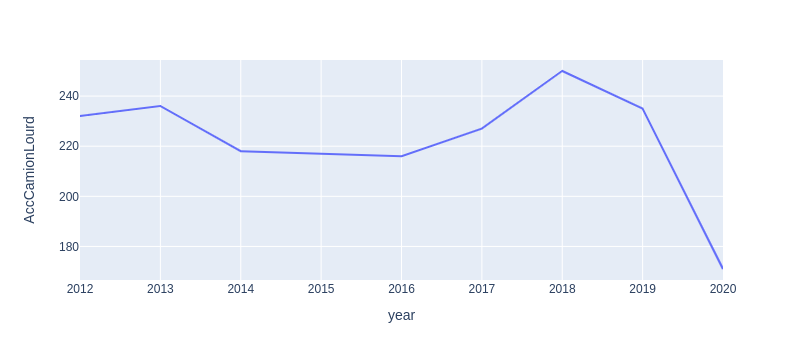

In [109]:
camion = df[(df['nb_camionLourd_tractRoutier'] > 0) & (df['GRAVITE'] == 'Léger')]
camionYear = camion.groupby("year").count()['NO_SEQ_COLL']
camionYear.name = "AccCamionLourd"
px.line(camionYear.reset_index(), x='year', y='AccCamionLourd')

### Quel mois?

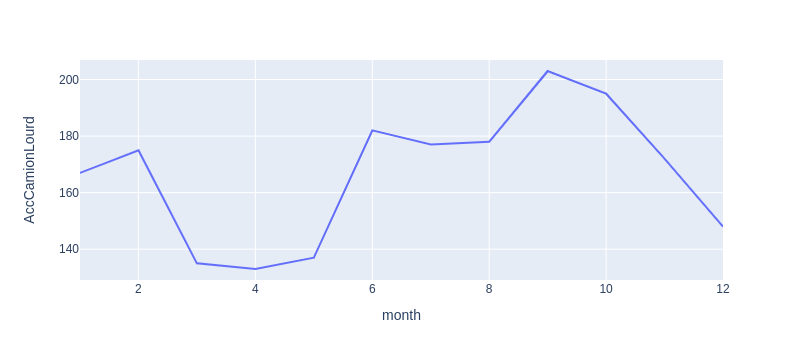

In [110]:
camion = df[(df['nb_camionLourd_tractRoutier'] > 0) & (df['GRAVITE'] == 'Léger')]
camionMonth = camion.groupby("month").count()['NO_SEQ_COLL']
camionMonth.name = "AccCamionLourd"
px.line(camionMonth.reset_index(), x='month', y='AccCamionLourd')

### Quel jour de la semaine

In [111]:
pd.unique(df['GRAVITE'])

array(['Dommages matériels inférieurs au seuil de rapportage',
       'Dommages matériels seulement', 'Léger', 'Grave', 'Mortel'],
      dtype=object)

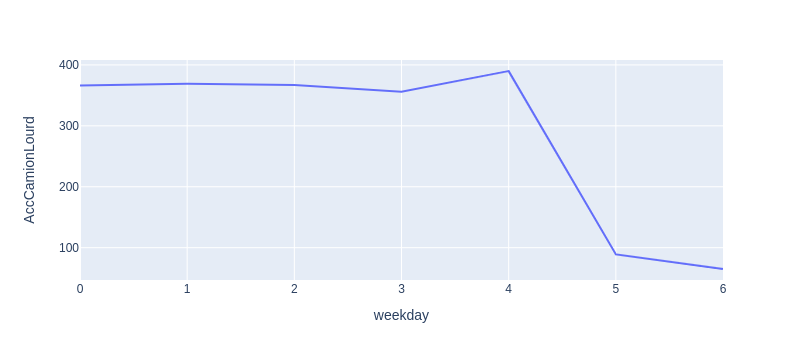

In [112]:
camion = df[(df['nb_camionLourd_tractRoutier'] > 0) & (df['GRAVITE'] == 'Léger')]
camionWkdD = camion.groupby("weekday").count()['NO_SEQ_COLL']
camionWkdD.name = "AccCamionLourd"
px.line(camionWkdD.reset_index(), x='weekday', y='AccCamionLourd')

### Moment journee

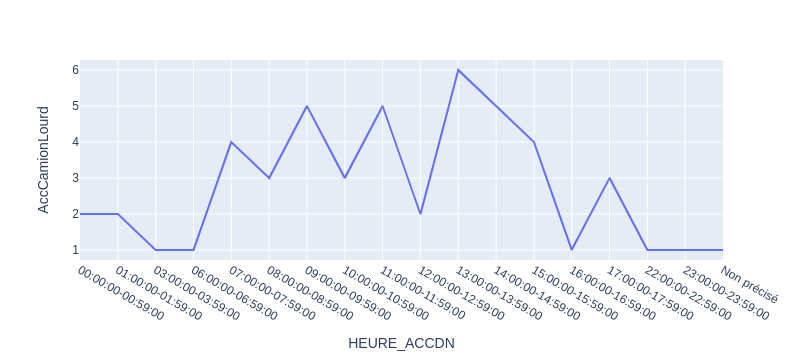

In [116]:
camion = df[(df['nb_camionLourd_tractRoutier'] > 0) & (df['GRAVITE'] == 'Mortel')]
camionHeure = camion.groupby("HEURE_ACCDN").count()['NO_SEQ_COLL']
camionHeure.name = "AccCamionLourd"
px.line(camionHeure.reset_index(), x='HEURE_ACCDN', y='AccCamionLourd')

## Quelles sont les zones à risques ?

In [101]:
ZoneCol = ['CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE', 'CD_ASPCT_ROUTE', 'CD_ETAT_CHASS', 'CD_ENVRN_ACCDN']

Index(['NO_SEQ_COLL', 'JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP',
       'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'RUE_ACCDN',
       'TP_REPRR_ACCDN', 'ACCDN_PRES_DE', 'NB_METRE_DIST_ACCD',
       'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'NO_ROUTE', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS',
       'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE',
       'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'CD_PNT_CDRNL_REPRR',
       'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN',
       'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'MRC',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'NB_DECES_PIETO

#### Aspect de la route

In [ ]:
valName = """
11  Droit, plat
12  Droit, en haut de la pente
13  Droit, dans la pente
14  Droit, en bas de la pente
21  Courbe, plat
22  Courbe, en haut de  pente
23  Courbe, dans la pente
24  Courbe, en bas de pente 
"""
df['CD_ASPCT_ROUTE'].value_counts()


11.0    177323
13.0      7042
21.0      3554
12.0      2955
14.0      2323
23.0       735
22.0       398
24.0       277
Name: CD_ASPCT_ROUTE, dtype: int64

> Les pentes et les courbes sont des endroits a risque

#### Configuration de la route 

In [130]:
valName = """
1  Sens unique
2  Deux sens, une voie 
3  Deux sens, plus d’une voie 
4  Sép aménagement franch
5  Sép aménagement infranch
9  Autre (ex.: balises, voie de virage à gauche dans les deux sens)
    Non précisé
"""
df['CD_CONFG_ROUTE'].value_counts()


3.0    53186
2.0    53018
1.0    50340
9.0    12197
5.0     8257
4.0     6230
Name: CD_CONFG_ROUTE, dtype: int64

> Zone la plus sécuritaire pour tous les véhicules c'est quand il y a des terres pleins

In [131]:
df[df['nb_camionLourd_tractRoutier'] > 0]['CD_CONFG_ROUTE'].value_counts()


1.0    6538
3.0    5283
2.0    4978
9.0     976
5.0     841
4.0     593
Name: CD_CONFG_ROUTE, dtype: int64

> Pour les camions, les rues à sens unique sont plus à risque.

In [138]:
sConfRoute = df[df['nb_camionLourd_tractRoutier'] > 0].groupby(['year', 'CD_CONFG_ROUTE']).count()['NO_SEQ_COLL']
sConfRoute.name = 'confRouteCamion'

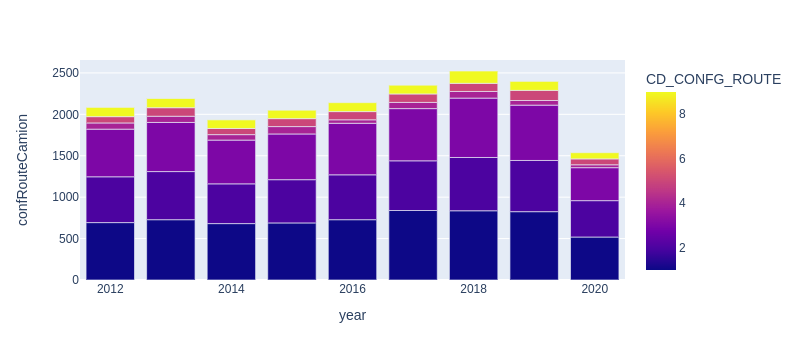

In [144]:
px.bar(sConfRoute.reset_index(), x='year', y='confRouteCamion', color = 'CD_CONFG_ROUTE', barmode='group')

## L’architecture du réseau routier est t-elle vecteur d’accidents ?



## Y a-t-il une relation entre la vitesse autorisée et la gravité des accidents ?



## Sur quel type de routes et raison météorologiques se produisent les accidents avec un piéton/cycliste



Catégorie [1,2,3,4,5,6,7,8,9,10] + NAN
1.  Voie réservée en service
2.  Voie lente/voie de dep
3.  Perte/gain de voie
4.  Voie de virage à gauche
5.  Voie cyclable/désignée
6.  Voie de circulation
7.  Accotement
8.  Terre-plein central ou îlot
9.  Trottoir
10.  Autre /Non précisé


In [146]:
lourd = (df['nb_camionLourd_tractRoutier'] > 0)
leger = (df['nb_automobile_camion_leger'] > 0)
cycliste = (df['nb_bicyclette'] > 0)
minibus = (df['nb_tous_autobus_minibus'] > 0)
cyclomoteur = (df['nb_cyclomoteur'] > 0)
moto = (df['nb_motocyclette'] > 0)
urgence = (df['nb_urgence'] > 0)

In [156]:
sPos = df[lourd & cycliste].groupby(['year', 'CD_POSI_ACCDN']).count()['NO_SEQ_COLL']
sPos.name = "nbr_incidents"

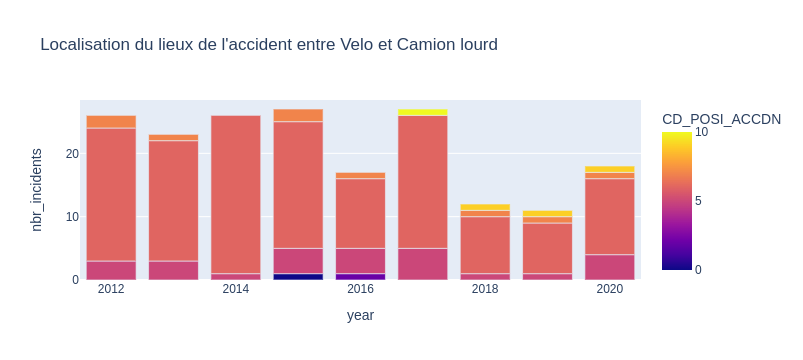

In [157]:
px.bar(sPos.reset_index(),
       x='year',
       y="nbr_incidents",
       color = 'CD_POSI_ACCDN',
       barmode='group',
       title="Localisation du lieux de l'accident entre Velo et Camion lourd")

> 1. Les accidents se déroulent majoritairement sur la route
> 2. Prequ'un accident par année entre camion et vélo sur le bord de la chaussé.
> 3.Un accident par années entre cycliste et camion sur les voies cyclables. (Ne protège pas 100% les pistes cyclables)

### Localisation

- 31    Carrefour 
- 32  En intersection 
- 33  Près de intersec/carrefour 
- 34  Entre intersections
- 35  Passage à niveau
- 36 Pont  
- 37  Autre pont (viaduc)
- 38  Tunnel
- 39  Sous un pont ou un viaduc
- 40  Centre commercial
- 99  Autres <br>
- Non précisé


In [170]:
df['CD_LOCLN_ACCDN'] = df['CD_LOCLN_ACCDN'].astype(str)
sLoc = df[lourd & cycliste].groupby(['year', 'CD_LOCLN_ACCDN']).count()['NO_SEQ_COLL']
sLoc.name = "nbr_incidents"

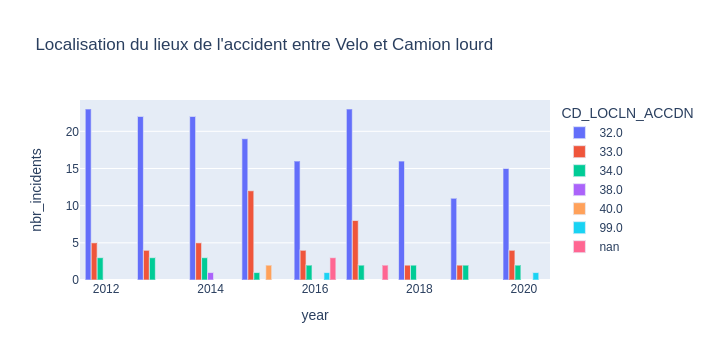

In [173]:
px.bar(sLoc.reset_index(),
       x='year',
       y="nbr_incidents",
       color = 'CD_LOCLN_ACCDN',
       barmode='group',
       title="Localisation du lieux de l'accident entre Velo et Camion lourd")

> 1. De loin les intersections les endroits les plus dangeureux (32)
> 2. Ou pret des intersections (33)

## Météo

- 11 ClairAbsence totale de nuages ou présence de nuages qui n’a pas pour effet d’assombrir ou de rendre la vision moins distincte. 

- 12 Couvert (nuageux/sombre)Ciel couvert de nuages sombres et épais ayant pour effet d’assombrir et de rendre la vision moins distincte. 

- 13 Brouillard/brume« Fumée blanche opaque » formée de très petites gouttelettes d’eau en suspension dans l’air. 

- 14 Pluie/bruineTombée régulière et continue de gouttelettes d’eau venant des nuages. 

- 15 Averse (pluie forte)Pluie soudaine et abondante. 

- 16 Vent fort (pas de poudrerie, pas de pluie)

- 17 Neige/grêleTombée de gouttelettes d’eau cristallisées sous forme de neige ou de grêle. 

- 18 Poudrerie/tempête de neigeNeige chassée par le vent (souvent en rafales) ou chute de neige accompagnée d’un vent violent. 
- 19 Verglas Couche de glace, généralement très mince, qui se forme lorsque tombe une pluie surfondue venant en contact avec des corps solides audessous de zéro degré Celsius. 

- 99 Autre

In [174]:
df['CD_COND_METEO'] = df['CD_COND_METEO'].astype(str)
sMet = df[lourd & cycliste].groupby(['year', 'CD_COND_METEO']).count()['NO_SEQ_COLL']
sMet.name = "nbr_incidents"

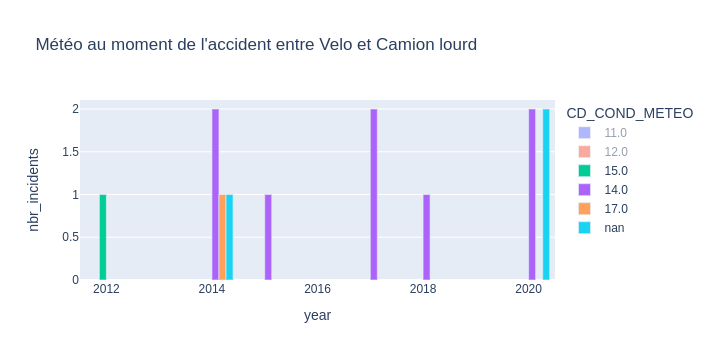

In [175]:
px.bar(sMet.reset_index(),
       x='year',
       y="nbr_incidents",
       color = 'CD_COND_METEO',
       barmode='group',
       title="Météo au moment de l'accident entre Velo et Camion lourd")

> La pluie semble affectée les accidents entre vélo et camion lourd

## Relation zone de vitesse et gravité des accidents

In [179]:
df['GRAVITE'] = df['GRAVITE'].replace(
                        {"Mortel":5,
                         "Grave" :4,
                         "Léger" :3,
                         "Dommages matériels seulement": 2,
                         "Dommages matériels inférieurs au seuil de rapportage":1})
    

In [209]:
relationVitesse = df[~df['VITESSE_AUTOR'].isna()].loc[:, ['GRAVITE', 'VITESSE_AUTOR', 'NO_SEQ_COLL']]
relationVitesse['VITESSE_AUTOR']= relationVitesse['VITESSE_AUTOR'].astype(str)
relationVitesse['GRAVITE']= relationVitesse['GRAVITE'].astype(str)

In [210]:
sRelVit = relationVitesse.groupby(['GRAVITE', 'VITESSE_AUTOR']).count().rename(columns={"NO_SEQ_COLL":"NbrIncidents"})

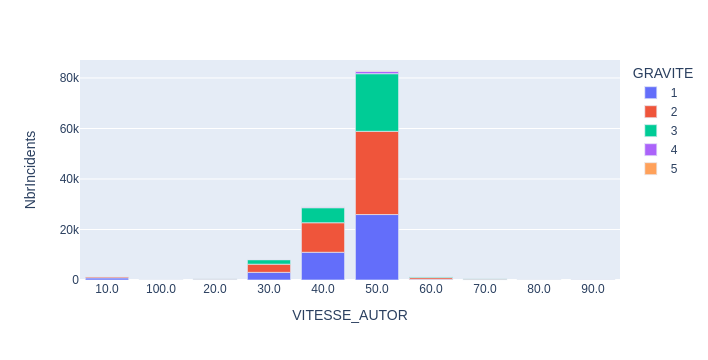

In [212]:
px.bar(sRelVit.reset_index(), x='VITESSE_AUTOR', y='NbrIncidents', color='GRAVITE')